In [5]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "1"

from dualneuron.screening.sets import ImagenetImages, RenderedImages
from dualneuron.screening.run import activations

from pathlib import Path
import dualneuron
import numpy as np

import matplotlib.pyplot as plt

token = os.getenv("HF_TOKEN")
data_dir = os.getenv("DATA_DIR")

In [3]:
resps, idx = activations(
    data_dir=data_dir + "datasets", 
    token=token, 
    split='test', 
    dataset="imagenet", 
    area='v4',
    batch_size=128,
    num_workers=2,
)

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 782/782 [12:52<00:00,  1.01it/s]


In [14]:
model_name = "V4ColorTaskDriven"
package_dir = Path(dualneuron.__file__).parent
mask_path = package_dir / "twins" / model_name / "mask.npy"
mask = np.load(mask_path)

In [36]:
dset = ImagenetImages(
    data_dir=data_dir + "datasets",
    token=token,
    split='test',
    use_center_crop=True,
    use_resize_output=True,
    use_grayscale=False,
    use_normalize=False,
    use_mask=True,
    use_norm=False,
    mask=mask,
    num_channels=3,
    output_size=(224, 224),
    crop_size=236,
    bg_value=0.0,
    norm=None,
)

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

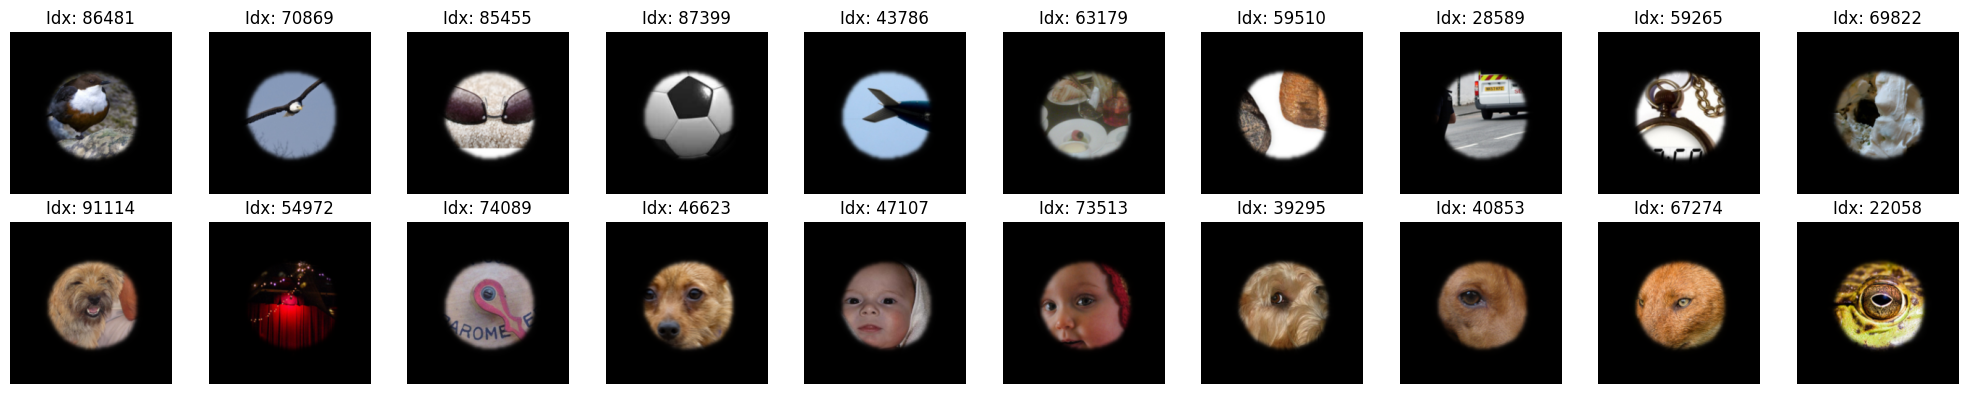

In [31]:
indices = idx[:, 4]
lowidx = indices[:10]
highidx = indices[-10:]

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i, ax in enumerate(axs[0]):
    img, cl = dset[lowidx[i]]
    ax.imshow(img.permute(1, 2, 0), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Idx: {lowidx[i]}')
    
for i, ax in enumerate(axs[1]):
    img, cl = dset[highidx[i]]
    ax.imshow(img.permute(1, 2, 0), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Idx: {highidx[i]}')
    
plt.tight_layout()
plt.show()

In [38]:

dset_rendered = RenderedImages(
    data_dir=data_dir + "rendered_processed",
    use_center_crop=True,
    use_resize_output=True,
    use_grayscale=False,
    use_normalize=False,
    use_mask=True,
    use_norm=False,
    mask=mask,
    num_channels=3,
    output_size=(100, 100),
    crop_size=236,
    bg_value=0.0,
    norm=None,
)

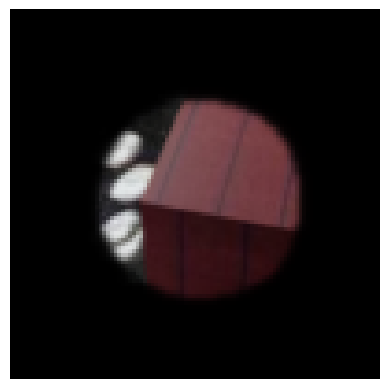

In [39]:
img, cl = dset_rendered[40]
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.axis('off')
plt.show()